                               MyDramaList Top 265 Korean Dramas
For the past 5 years, we recognise that korean dramas have increased in international popularity. This is due to factors such that Korean Production companies i.e. Studio S partnering up with various streaming services. Throughout this project, we will inspect what directors, tv stations, actors have been successful in producing the most korean dramas in this list. In that regard, we will answer the answers below:
- How many Kdramas were released in what year? 
- Which TV Station has aired the most successful dramas? 
- What genres are considered to be the most popular? 
- What director has the most sucessful dramas in the past few years?
- What year produced the most popular dramas(top 20)?
- What actor from the main cast has appeared in the most successful dramas to date?

We'll begin by importing all the necessary modules as well as the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dramas = pd.read_csv("kdramas.csv")
dramas.describe()

,Year of release,Number of Episodes,Rating
count,265.000000,265.000000,265.000000
mean,2018.505660,18.656604,8.545660
std,3.332713,12.995301,0.222397
min,2003.000000,1.000000,8.300000
25%,2017.000000,14.000000,8.400000
50%,2019.000000,16.000000,8.500000
75%,2021.000000,20.000000,8.700000
max,2023.000000,133.000000,9.200000


In [2]:
dramas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  265 non-null    object 
 1   Aired Date            265 non-null    object 
 2   Year of release       265 non-null    int64  
 3   OriginalNetwork       265 non-null    object 
 4   StreamingService      166 non-null    object 
 5   Aired On              265 non-null    object 
 6   Number of Episodes    265 non-null    int64  
 7   Duration              265 non-null    object 
 8   Content Rating        260 non-null    object 
 9   Rating                265 non-null    float64
 10  Synopsis              265 non-null    object 
 11  Genre                 265 non-null    object 
 12  Tags                  265 non-null    object 
 13  Director              264 non-null    object 
 14  Screenwriter          264 non-null    object 
 15  Cast                  2

In [3]:
dramas.head(2)

,Name,Aired Date,Year of release,OriginalNetwork,StreamingService,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,14-May-21,2021,Netflix,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon,Tang Jun Sang,Hong Seung Hee,Jung ...","Page One Film, Number Three Pictures",#1
1,Weak Hero Class 1,18-Nov-22,2022,Wavve,Viki,Friday,8,40 min.,18+ Restricted (violence & profanity),9.1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama\r","Bromance, Smart Male Lead, Violence, School Bu...",You Su Min,Jun Hee Han,"Park Ji Hoon,Choi Hyun Wook,Hong Kyung,Kim Su ...",PlayList Global,#2


Let's clean the data first inorder for us to better answer each of the questions:

In [4]:
#change the column names
dramas.rename(columns={"Name": "name", "Aired Date": "aired_date", "Year of release": "release_year" ,
                       "OriginalNetwork":"original_network", "Aired On":"aired_on", "Number of Episodes":"episodes",
                       "Duration":"duration","Content Rating":"content_rating", "Rating":"rating",
                       "Synopsis":"synopsis", "Genre":"genre", "Tags":"tags", "Director":"director",
                       "Screenwriter":"screenwriter" , "Cast":"cast" , "Production companies":"production_companies",
                       "Rank": "rank", "StreamingService": "streaming_service"
                      
                      }, inplace=True)
dramas.head(1)

,name,aired_date,release_year,original_network,streaming_service,aired_on,episodes,duration,content_rating,rating,synopsis,genre,tags,director,screenwriter,cast,production_companies,rank
0,Move to Heaven,14-May-21,2021,Netflix,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon,Tang Jun Sang,Hong Seung Hee,Jung ...","Page One Film, Number Three Pictures",#1


In [5]:
#remove the '#' sign from the rank column 
dramas['rank'] = dramas['rank'].str.replace("#", "")
dramas.head(2)

,name,aired_date,release_year,original_network,streaming_service,aired_on,episodes,duration,content_rating,rating,synopsis,genre,tags,director,screenwriter,cast,production_companies,rank
0,Move to Heaven,14-May-21,2021,Netflix,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon,Tang Jun Sang,Hong Seung Hee,Jung ...","Page One Film, Number Three Pictures",1
1,Weak Hero Class 1,18-Nov-22,2022,Wavve,Viki,Friday,8,40 min.,18+ Restricted (violence & profanity),9.1,Yeon Shi Eun is a model student who ranks at t...,"Action, Youth, Drama\r","Bromance, Smart Male Lead, Violence, School Bu...",You Su Min,Jun Hee Han,"Park Ji Hoon,Choi Hyun Wook,Hong Kyung,Kim Su ...",PlayList Global,2


In [6]:
#Determine how many Kdramas were released in what year
yr_count = {}
for a in dramas['release_year']:
    if a not in yr_count:
        yr_count[a] = 1
    elif a in yr_count:
        yr_count[a] += 1
yr_count_sorted = sorted(yr_count.items(), key=lambda x:x[1])
dict(yr_count_sorted)

{2003: 1,
 2009: 1,
 2010: 1,
 2006: 1,
 2007: 1,
 2011: 4,
 2014: 7,
 2012: 7,
 2015: 9,
 2023: 10,
 2013: 11,
 2016: 13,
 2018: 24,
 2017: 27,
 2020: 35,
 2022: 37,
 2019: 37,
 2021: 39}

Most of the popular korean dramas in this list were released between 2019-2022. This is quite surprising since thats the COVID error but my guess is that these dramas were released prior and after the covid scare.
In the rest of our analysis, we'll use the Top 100 Kdramas.

In [7]:
#Filter out the top 100 Kdramas
dramas['rank'] = dramas['rank'].astype(int)
top_100 = dramas[dramas['rank'] <= 100] #done based on rank
top_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  100 non-null    object 
 1   aired_date            100 non-null    object 
 2   release_year          100 non-null    int64  
 3   original_network      100 non-null    object 
 4   streaming_service     73 non-null     object 
 5   aired_on              100 non-null    object 
 6   episodes              100 non-null    int64  
 7   duration              100 non-null    object 
 8   content_rating        100 non-null    object 
 9   rating                100 non-null    float64
 10  synopsis              100 non-null    object 
 11  genre                 100 non-null    object 
 12  tags                  100 non-null    object 
 13  director              100 non-null    object 
 14  screenwriter          100 non-null    object 
 15  cast                  10

In [8]:
top_100.shape #print out the number of rows and cols in the DF

(100, 18)

In [9]:
#RE-Print out the number of Kdramas produced per year from the Top 100 List
top_100_yr_count = {}
for a in top_100['release_year']:
    if a not in top_100_yr_count:
        top_100_yr_count[a] = 1
    elif a in top_100_yr_count:
        top_100_yr_count[a] += 1
yr_count_sorted = sorted(top_100_yr_count.items(), key=lambda x:x[1])
dict(yr_count_sorted)

{2003: 1,
 2013: 1,
 2012: 1,
 2015: 3,
 2014: 3,
 2016: 7,
 2018: 9,
 2019: 9,
 2017: 10,
 2023: 10,
 2020: 12,
 2022: 16,
 2021: 18}

In the top 100 dramas, we still notice a surge in the years 2021, 2022 and 2020.

In [10]:
#What TV Station produced the most Korean Dramas in this list
orig = top_100['original_network'].unique()
print(list(orig))

['Netflix', 'Wavve', 'tvN', 'SBS', 'ENA', 'jTBC', 'MBC', 'KBS2', 'OCN']


In [11]:
top_100_copy = top_100[['name', 'original_network']]
#top_100_copy.set_index(['name', 'original_network'])
tv_networks = top_100_copy.groupby(['original_network']).count()

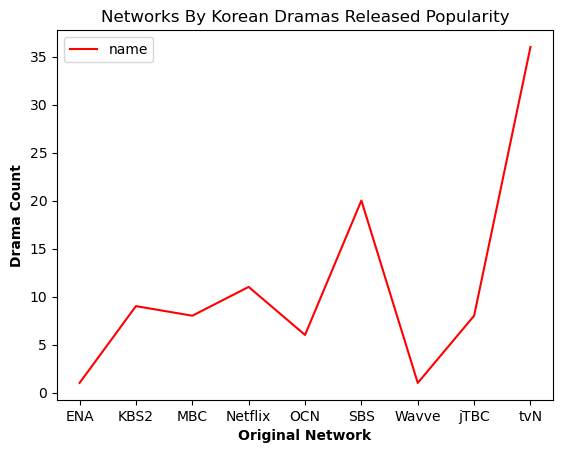

In [12]:
tv_networks.plot(color='r')
plt.ylabel('Drama Count', fontweight ='bold')
plt.xlabel('Original Network', fontweight ='bold')
plt.title('Networks By Korean Dramas Released Popularity')
plt.show()

We now know that tVN has produced the most popular kdramas in the past two decades. This is honestly not surprising since i can think of a few that i have enjoyed in the past decade including Signal.

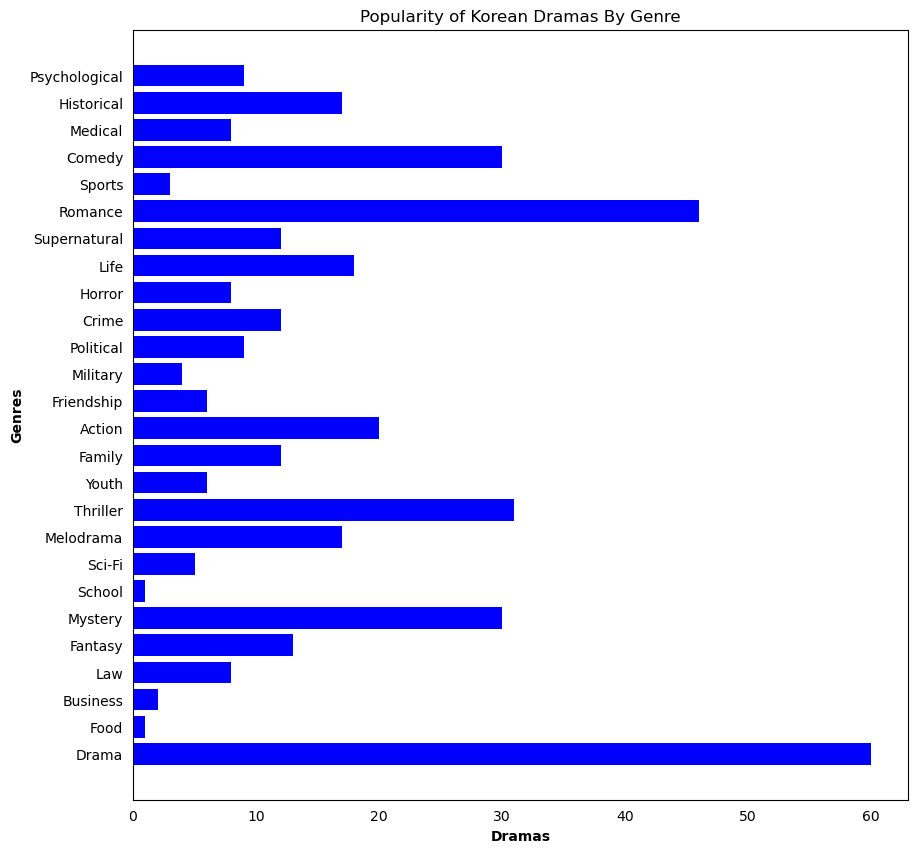

In [13]:
#What genres are considered to be the most popular?
top_100.head(2)
#unique genres - array
genres = top_100['genre'].unique() 
#convert the series into a list
genres = list(genres)

#create a list and add the individual genres into the list after splitting them apart
unique_genres = []
for g in genres:
    g_new = g.split(", ")
    unique_genres.append(g_new)
#convert the list of lists into a list    
each_genres = {x for l in unique_genres for x in l} 

#initialize a new list where we will store the modified genres
each_genre_modified = [] 
for s in each_genres:
    s = s.replace(" ","")
    s = s.replace("\xa0","")
    s = s.replace("\r","")
    each_genre_modified.append(s)

#use a set to convert the list into a unique one    
each_genre_modified_set = set(each_genre_modified) 
each_genre_modified = each_genre_modified_set

#create a dictionary and compute the number of times that each genre is used in the top 100 list
#This will amount to the number of dramas correspoding to that genre
genres_dict = {}
all_g = top_100['genre']
for genre in each_genre_modified:
    for g in all_g:
        if (genre not in genres_dict) and (genre in g):
            genres_dict[genre] = 1
        elif (genre in genres_dict) and (genre in g):
            genres_dict[genre] += 1
Genres = list(genres_dict.keys())
Values = list(genres_dict.values())

#plot the Drama Popularity By Genre Graph
plt.figure(figsize = (10, 10))
plt.barh(range(len(genres_dict)), Values, tick_label=Genres, color='b')
plt.ylabel('Genres', fontweight ='bold')
plt.xlabel('Dramas', fontweight ='bold')
plt.title('Popularity of Korean Dramas By Genre')
plt.tick_params(left = False, bottom = False)
plt.show()  


We can conclude that "Drama" is definitely the most popular Genre produced. I mean, thats why we watch TV, correct?
Any series without an engaging story is considered boring.

<Figure size 1e+06x100000 with 0 Axes>

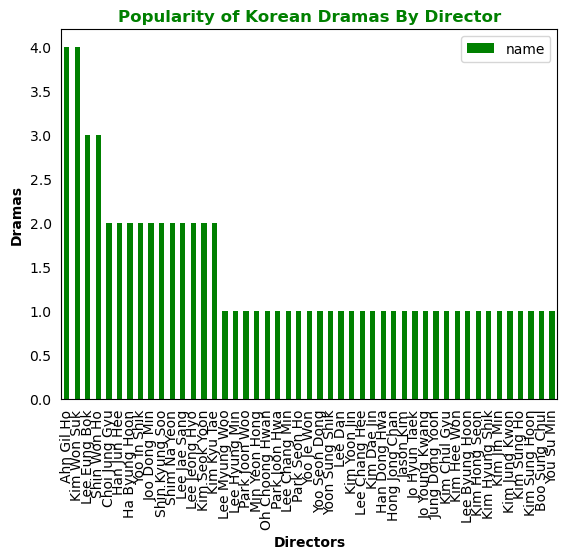

In [14]:
#What director has directed the most sucessful dramas in the past 10 years?
past_10_years = top_100[top_100['release_year'] > 2012] # last 10 years
#get a list of dramas with one director
past_10_years_one_director = top_100[~top_100['director'].str.contains(',')]
#extract the columns necessary to compute and plot
past_10_years_one_director_copy = past_10_years_one_director[['name', 'director']]
#group by the director column to get the drama count by director
directors = past_10_years_one_director_copy.groupby(['director']).count()
#sort values
df_sorted = directors.sort_values('name', ascending = False)
#plot the dramas by director
plt.figure(figsize=(10000,1000))
df_sorted.plot(kind='bar',color="g")

plt.ylabel('Dramas', fontweight ='bold')
plt.xlabel('Directors', fontweight ='bold')
plt.title('Popularity of Korean Dramas By Director', fontweight ='bold', c = 'g')
plt.tick_params(left = False, bottom = False)
plt.show()

Now we know that our top directors are Ahn Gil Ho and Kim Won Suk. Let's list some of the dramas that have been produced by these directors. 

In [15]:
ahn_dramas = past_10_years_one_director[past_10_years_one_director['director'] == 'Ahn Gil Ho']
sum = 0
count = 0
for a in ahn_dramas['rating']:
    sum += a
    count +=1
avg_rating_for_ahn_dramas = sum/count
print(list(ahn_dramas['name']))
print(avg_rating_for_ahn_dramas)

['The Glory Part 2', 'The Glory', 'Happiness', 'Stranger']
8.899999999999999


In [16]:
suk_dramas = past_10_years_one_director[past_10_years_one_director['director'] == 'Kim Won Suk']
sum1 = 0
count1 = 0
for a in suk_dramas['rating']:
    sum += a
    count +=1
avg_rating_for_suk_dramas = sum/count
print(list(suk_dramas['name']))
print(avg_rating_for_suk_dramas)

['Signal', 'Arthdal Chronicles Part 3', 'Arthdal Chronicles Part 2', 'Misaeng']
8.825


Overall, we can confirm that Ahn Gil Ho has produced the most successful kdramas in the past 10 years based on popularity. From a consumer perspective, i would choose Kim Won Suk since i have enjoyed all his kdramas from this list.

In [17]:
#What year produced the most popular dramas(top 20)? 
top_20 = top_100[top_100['rank'] <= 20]
top_20.shape

(20, 18)

In [18]:
#find the number of dramas produced per year in the top 20
drama_count_by_yr = {}
for a in top_20['release_year']:
    if a not in drama_count_by_yr:
        drama_count_by_yr[a] = 1
    elif a in drama_count_by_yr:
        drama_count_by_yr[a] += 1
drama_count_by_yr

{2021: 4, 2022: 5, 2020: 4, 2015: 1, 2018: 2, 2017: 1, 2023: 2, 2019: 1}

In [19]:
#Let's print these dramas for reference:
dramas_2022 = top_20[top_20['release_year'] == 2022]
print(dramas_2022['name'])

1                                     Weak Hero Class 1
5                                      Alchemy of Souls
8                            Under the Queen's Umbrella
15    Alchemy of Souls Season 2: Light and Shadow (2...
16                           Extraordinary Attorney Woo
Name: name, dtype: object


Yes, 2022 was not a bad year. I do recall being in love with 'Alchemy of souls'

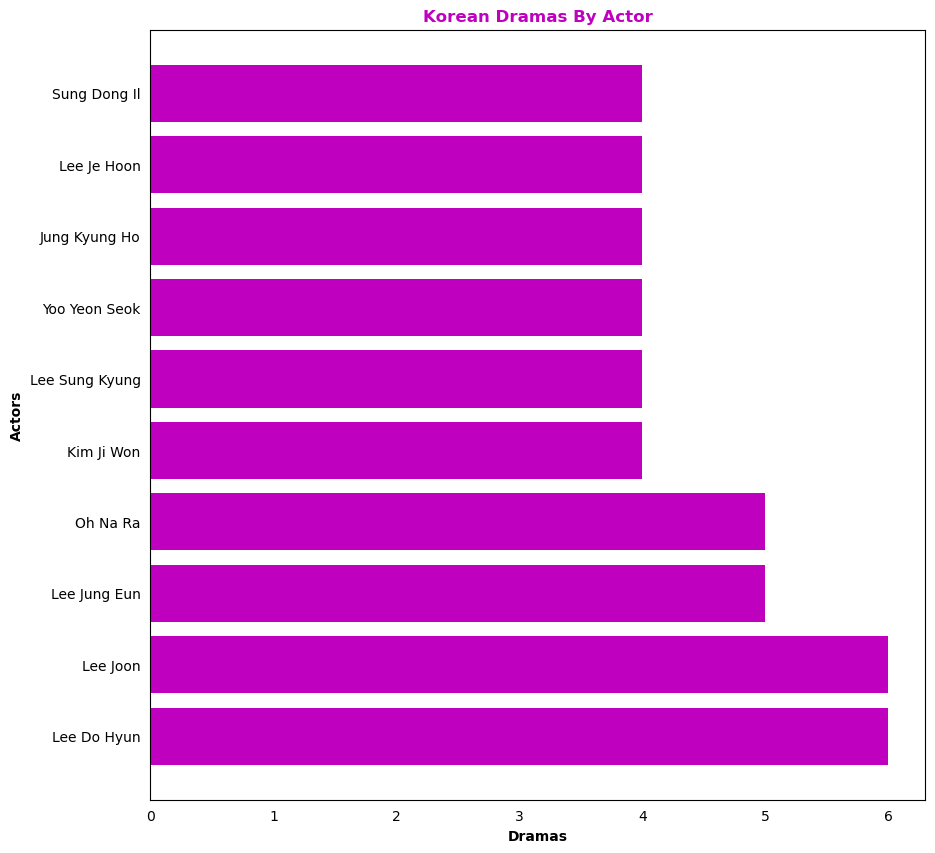

In [20]:
from operator import itemgetter
#What actor from the main cast has appeared in the most successful dramas to date?
#top_50 = top_100[top_100['rank'] <= 100]
cast = top_100['cast'].unique()

#convert the series into a list
cast = list(cast)

#create a list and add the individual actor names - split by ","
actors = []
for c in cast:
    a = c.split(",")
    actors.append(a)
    
#convert the list of lists into a list  
unique_actors =  {x for l in actors for x in l} 

#get the unique actor names from the newly created list - actors  - using a set
unique_actors_set = set(unique_actors)

#use the new list to find out how many dramas each actor has starred in - we can do this using a for loop
all_actors = top_100['cast']
   
actors_dict = {}
for a in unique_actors_set:
    for actor in all_actors:
        if (a not in actors_dict) and (a in actor):
            actors_dict[a] = 1
        elif (a in actors_dict) and (a in actor):
            actors_dict[a] += 1
            

#Since we have a lot of actors and most have the same values, we will plot the top 10 actors
top_10_actors = dict(sorted(actors_dict.items(), key = itemgetter(1), reverse=True)[:10])
Actors = list(top_10_actors.keys())
Values = list(top_10_actors.values())
x=list(top_10_actors.keys())
y=list(top_10_actors.values())

#plot the Drama Popularity By Genre Graph
plt.figure(figsize = (10, 10))
plt.barh(range(len(top_10_actors)), Values, tick_label=Actors, color='m')
plt.ylabel('Actors', fontweight ='bold')
plt.xlabel('Dramas', fontweight ='bold')
plt.title('Korean Dramas By Actor', color='m' , fontweight ='bold')
plt.tick_params(left = False, bottom = False)
plt.show()  

Lee Joon and Lee Do Hyun are the two actors that have taken part in the most popular dramas in the 20 year run that this data was pulled for. It is also interesting that these actors are in their late 20s to mid 30s and may have spent about 10 years in the industry. 

<Figure size 2000x2000 with 0 Axes>

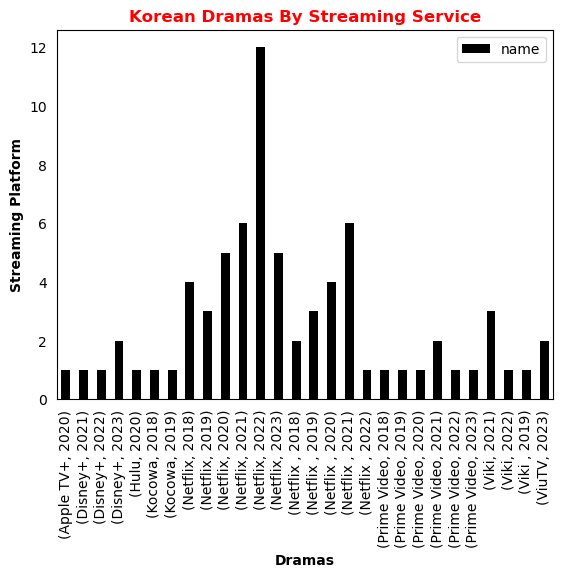

In [21]:
#find out the giant streaming service for kdramas
streaming = top_100[['name', 'streaming_service', 'release_year']]
services = streaming.groupby(['streaming_service', 'release_year']).count()
plt.figure(figsize = (20, 20))
services.plot(kind = 'bar', color = 'black')
plt.tick_params(left = False, bottom = False)
plt.xticks(rotation = 90)
plt.ylabel('Streaming Platform', fontweight ='bold')
plt.xlabel('Dramas', fontweight ='bold')
plt.title('Korean Dramas By Streaming Service', fontweight ='bold', color = 'red')
plt.show()

To conclude, we have noticed that most of the popular korean dramas were released after 2019. This doesn't mean that good kdramas were not released before this date. It just means this is when their popularity sky rocketted. So many factors were in play here including the collaboration of original networks with multiple streaming services and as we can see above, the major streaming giant, Netflix. Netflix has been instrumental in bringing these kdramas to the world and it continues to do so in the coming years. In the same way, other streaming companies have jumped ship and are now starting to add korean dramas to their lineup. We can only expect to see these numbers multiply in the coming years.